# AutoML Classification

**Toda la información presentada en este trabajo fue extraída de**:<BR>
* [PyCaret](https://pycaret.org/)
* [Automated Machine Learning](https://www.packtpub.com/product/automated-machine-learning/9781800567689)
* [Hands-On Automated Machine Learning](https://www.packtpub.com/product/hands-on-automated-machine-learning/9781788629898)

________________________________

**Definición**: AutoML tiene como objetivo facilitar el proceso de creación de modelos de AA mediante la automatización de los pasos de uso común, como el preprocesamiento de funciones, la selección de modelos y el ajuste de hiperparámetros.

## Ciclo de Vida del ML

![ML model life cycle](./img/proc.png)

### Ecosistema AutoML

![Ecosistema](./img/eco.png)

### AutoML Componentes

* Automated feature preprocessing
* Automated algorithm selection
* Hyperparameter optimization

### Principales Librerias

#### [Featuretools](https://www.featuretools.com/)
#### [Auto-sklearn](http://automl.github.io/auto-sklearn/stable/)
#### [MLBox](http://mlbox.readthedocs.io/en/latest/)
#### [Tree-Based Pipeline Optimization Tool (TPOT)](http://epistasislab.github.io/tpot/)
#### [PyCaret](https://pycaret.org/)
#### [Auto-Weka](github.com/automl/autoweka)
#### [Microsoft Neural Network Intelligence (NNI)]( https://github.com/microsoft/nni/)
#### [Uber's automated ML tool (Ludwin)]( https://github.com/uber/ludwig/)
#### [AutoGluon](https://github.com/awslabs/autogluon/)
#### [H2O AutoML](https://github.com/h2oai/h2o-3/)

___________________

In [1]:
from pycaret.datasets import get_data

#### Dataset
* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0 to PAY_6**: Repayment status by n months ago (PAY_0 = last month ... PAY_6 = 6 months ago) (Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **BILL_AMT1 to BILL_AMT6**: Amount of bill statement by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
* **PAY_AMT1 to PAY_AMT6**: Amount of payment by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
* **default**: Default payment (1=yes, 0=no) Target Column

In [2]:
dataset = get_data('credit')

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0    1000.0    5000.0        0  
2    1100.0    1069.0    1000.0        0  
3    9000.0     689.0     679.0        0  
4    1000.0    1000.0     800.0        0  

[5 rows x 24 columns]

In [3]:
dataset.shape

(24000, 24)

In [4]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

_______________________________

In [7]:
from pycaret.classification import *

In [8]:
exp_clf101 = setup(data = data, target = 'default', session_id=10001)

* **session_id** : A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

* **Original Data** : Displays the original shape of the dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including the target column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, 9 out of 24 features are inferred as categorical.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (22800, 24) is transformed into (15959, 91) for the transformed train set and the number of features have increased to 91 from 24 due to categorical encoding

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

In [9]:
best_model = compare_models()

#### [The ultimate guide to binary classification metrics](https://towardsdatascience.com/the-ultimate-guide-to-binary-classification-metrics-c25c3627dd0a)

#### [24 Evaluation Metrics for Binary Classification ](https://neptune.ai/blog/evaluation-metrics-binary-classification)

#### [Precision, Recall, F1, Accuracy en clasificación](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)

#### [F1 Score vs ROC AUC vs Accuracy vs PR AUC](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)

#### [The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7)

In [10]:
print(best_model)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [9]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True

### Decision Tree Classifier

In [10]:
dt = create_model('dt')

In [11]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10001, splitter='best')


### Random Forest Classifier

In [12]:
rf = create_model('rf')

In [13]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10001,
                       verbose=0, warm_start=False)


### Tune a Model

In [14]:
tuned_dt = tune_model(dt)

In [15]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10001, splitter='best')


In [16]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10001, splitter='best')


_________________

In [17]:
tuned_rf = tune_model(rf)

In [18]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10001,
                       verbose=0, warm_start=False)


In [19]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=-1, oob_score=False, random_state=10001,
                       verbose=0, warm_start=False)


### Plot a Model

#### AUC Plot

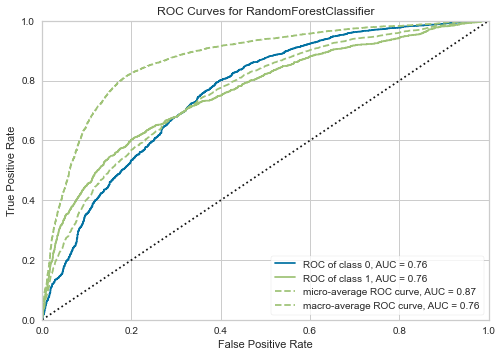

In [20]:
plot_model(tuned_rf, plot = 'auc')

#### Precision-Recall Curve

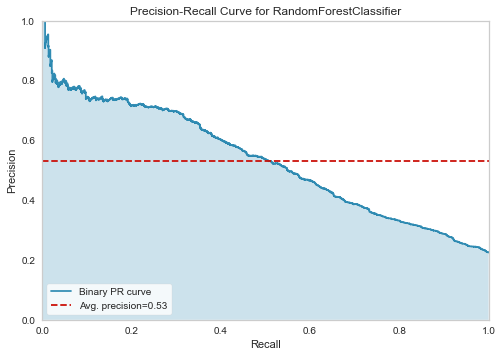

In [21]:
plot_model(tuned_rf, plot = 'pr')

#### Feature Importance Plot

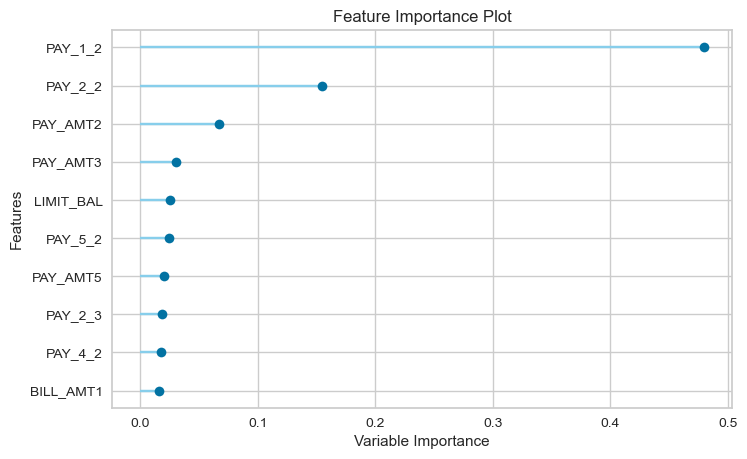

In [22]:
plot_model(tuned_rf, plot='feature')

#### Confusion Matrix

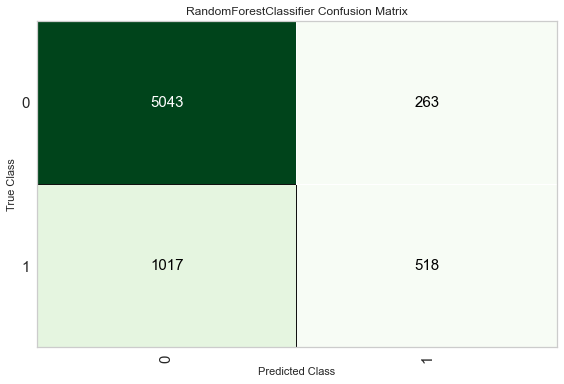

In [23]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [24]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict on test

In [25]:
predict_model(tuned_rf)

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       50000.0  34.0     9110.0    10454.0    12274.0    11780.0    14578.0   
1      210000.0  33.0       98.0     1090.0        0.0        0.0      580.0   
2      280000.0  39.0   130549.0   131955.0   134910.0   139280.0   139188.0   
3       80000.0  43.0    77871.0    71898.0    72926.0    73745.0    75675.0   
4      250000.0  43.0       -6.0     1298.0      826.0     2044.0      -16.0   
...         ...   ...        ...        ...        ...        ...        ...   
6836    20000.0  40.0     2946.0        0.0      390.0      390.0      390.0   
6837   110000.0  35.0   114023.0   102850.0    66639.0    57595.0    58814.0   
6838    50000.0  37.0    40994.0    43594.0    38222.0    13026.0    13268.0   
6839   150000.0  38.0      110.0      564.0    13347.0    13155.0    10610.0   
6840    20000.0  26.0    14962.0    14438.0    13921.0    15276.0    17019.0   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  \
0       18309.0    1500.0    2000.0  ...      0.0      0.0      0.0      0.0   
1         500.0    1120.0       0.0  ...      0.0      0.0      0.0      0.0   
2      271388.0    5000.0    5000.0  ...      0.0      0.0      0.0      0.0   
3       75999.0    1261.0    3214.0  ...      0.0      0.0      0.0      0.0   
4         -16.0    1304.0     830.0  ...      0.0      0.0      0.0      0.0   
...         ...       ...       ...  ...      ...      ...      ...      ...   
6836      390.0       0.0     390.0  ...      0.0      0.0      0.0      0.0   
6837    60086.0    4097.0    3360.0  ...      0.0      0.0      0.0      0.0   
6838    13497.0    5500.0       0.0  ...      0.0      0.0      0.0      0.0   
6839     8394.0     567.0   13504.0  ...      0.0      0.0      0.0      0.0   
6840    18099.0       0.0       0.0  ...      1.0      0.0      0.0      0.0   

      PAY_6_6  PAY_6_7  PAY_6_8  default  Label   Score  
0         0.0      0.0      0.0        0      0  0.7461  
1         0.0      0.0      0.0        0      0  0.7663  
2         0.0      0.0      0.0        1      1  0.7108  
3         0.0      0.0      0.0        0      0  0.6136  
4         0.0      0.0      0.0        0      0  0.8160  
...       ...      ...      ...      ...    ...     ...  
6836      0.0      0.0      0.0        0      0  0.7867  
6837      0.0      0.0      0.0        1      0  0.9104  
6838      0.0      0.0      0.0        0      1  0.7098  
6839      0.0      0.0      0.0        1      0  0.8885  
6840      0.0      0.0      0.0        0      1  0.7915  

[6841 rows x 91 columns]

### Finalize Model

In [26]:
final_rf = finalize_model(tuned_rf)

In [27]:
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=-1, oob_score=False, random_state=10001,
                       verbose=0, warm_start=False)


In [28]:
predict_model(final_rf)

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       50000.0  34.0     9110.0    10454.0    12274.0    11780.0    14578.0   
1      210000.0  33.0       98.0     1090.0        0.0        0.0      580.0   
2      280000.0  39.0   130549.0   131955.0   134910.0   139280.0   139188.0   
3       80000.0  43.0    77871.0    71898.0    72926.0    73745.0    75675.0   
4      250000.0  43.0       -6.0     1298.0      826.0     2044.0      -16.0   
...         ...   ...        ...        ...        ...        ...        ...   
6836    20000.0  40.0     2946.0        0.0      390.0      390.0      390.0   
6837   110000.0  35.0   114023.0   102850.0    66639.0    57595.0    58814.0   
6838    50000.0  37.0    40994.0    43594.0    38222.0    13026.0    13268.0   
6839   150000.0  38.0      110.0      564.0    13347.0    13155.0    10610.0   
6840    20000.0  26.0    14962.0    14438.0    13921.0    15276.0    17019.0   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  \
0       18309.0    1500.0    2000.0  ...      0.0      0.0      0.0      0.0   
1         500.0    1120.0       0.0  ...      0.0      0.0      0.0      0.0   
2      271388.0    5000.0    5000.0  ...      0.0      0.0      0.0      0.0   
3       75999.0    1261.0    3214.0  ...      0.0      0.0      0.0      0.0   
4         -16.0    1304.0     830.0  ...      0.0      0.0      0.0      0.0   
...         ...       ...       ...  ...      ...      ...      ...      ...   
6836      390.0       0.0     390.0  ...      0.0      0.0      0.0      0.0   
6837    60086.0    4097.0    3360.0  ...      0.0      0.0      0.0      0.0   
6838    13497.0    5500.0       0.0  ...      0.0      0.0      0.0      0.0   
6839     8394.0     567.0   13504.0  ...      0.0      0.0      0.0      0.0   
6840    18099.0       0.0       0.0  ...      1.0      0.0      0.0      0.0   

      PAY_6_6  PAY_6_7  PAY_6_8  default  Label   Score  
0         0.0      0.0      0.0        0      0  0.7477  
1         0.0      0.0      0.0        0      0  0.7775  
2         0.0      0.0      0.0        1      1  0.7156  
3         0.0      0.0      0.0        0      0  0.6292  
4         0.0      0.0      0.0        0      0  0.8316  
...       ...      ...      ...      ...    ...     ...  
6836      0.0      0.0      0.0        0      0  0.7861  
6837      0.0      0.0      0.0        1      0  0.9149  
6838      0.0      0.0      0.0        0      1  0.6606  
6839      0.0      0.0      0.0        1      0  0.8569  
6840      0.0      0.0      0.0        0      1  0.7256  

[6841 rows x 91 columns]

In [29]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         1   48      0      0      0      0   
1     200000    2          1         1   40      2      2      2      2   
2      50000    2          3         1   44      1      2      3      2   
3      60000    2          2         1   31      2      2     -1      0   
4     120000    2          3         2   32     -1      0      0      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...     8011.0    2028.0    2453.0    2329.0     431.0     300.0   
1      2  ...    89112.0    4200.0    4100.0    3000.0    3400.0    3500.0   
2      4  ...    15798.0    2100.0    1000.0    2300.0       0.0       0.0   
3      0  ...    30384.0    1132.0   60994.0    1436.0    1047.0    1056.0   
4      0  ...    81354.0    2429.0    3120.0    3300.0   10000.0    3200.0   

   PAY_AMT6  default  Label   Score  
0     500.0        0      0  0.8545  
1       0.0        1      1  0.7920  
2       0.0        1      0  0.5275  
3    1053.0        1      1  0.6894  
4    3200.0        0      0  0.9163  

[5 rows x 26 columns]

### Predict on unseen data

In [30]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8275

### Saving/Loading Model

In [31]:
save_model(final_rf,'./model/FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=6, max_features=1.0,
                                         max_leaf_n

______________________________

In [ ]:
from pycaret.classification import *

In [32]:
saved_final_rf = load_model('./model/FinalModel')

Transformation Pipeline and Model Successfully Loaded


In [33]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [ ]:
new_prediction['Label']

In [ ]:
new_prediction['Score']

________________________________

In [34]:
new_prediction.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         1   48      0      0      0      0   
1     200000    2          1         1   40      2      2      2      2   
2      50000    2          3         1   44      1      2      3      2   
3      60000    2          2         1   31      2      2     -1      0   
4     120000    2          3         2   32     -1      0      0      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...     8011.0    2028.0    2453.0    2329.0     431.0     300.0   
1      2  ...    89112.0    4200.0    4100.0    3000.0    3400.0    3500.0   
2      4  ...    15798.0    2100.0    1000.0    2300.0       0.0       0.0   
3      0  ...    30384.0    1132.0   60994.0    1436.0    1047.0    1056.0   
4      0  ...    81354.0    2429.0    3120.0    3300.0   10000.0    3200.0   

   PAY_AMT6  default  Label   Score  
0     500.0        0      0  0.8545  
1       0.0        1      1  0.7920  
2       0.0        1      0  0.5275  
3    1053.0        1      1  0.6894  
4    3200.0        0      0  0.9163  

[5 rows x 26 columns]

#### results of unseen_predictions and new_prediction are identical

In [35]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.8275

__________________________

________________________